# PA KELOMPOK 3 KECERDASAN BUATAN

### NAMA ANGGOTA KELOMPOK : 
### - Hadie Pratama Tulili
### - Rafi Izdihar
### - Muhammad Firdaus

## Table Of Contents

1. [Tujuan Dibuatnya Program](#1.-Tujuan-Dibuatnya-Program)
2. [Library yang digunakan](#2.-Library-yang-digunakan)
3. [Directory List](#3.-Directory-List)
2. [Visualisasi](#4.-Visualisasi)
2. [Library yang digunakan](#2.-Library-yang-digunakan)
2. [Library yang digunakan](#2.-Library-yang-digunakan)


# 1. Tujuan Dibuatnya Program

1. Untuk mengaplikasikan Convolutional Neural Networks (CNN) guna mengklasifikasikan dan memprediksi gambar anime, kartun atau manusia.

2. Untuk mengklasifikasikan suatu gambar ke salah satu dari 3 kategori : 
    **Anime, Cartoon, Human**

3. Total data yang ada didalam dataset berjumlah 8917 sampel yang terdiri dari 3 kategori. 

4. Jumlah data training yang digunakan sebesar 6241 sampel, jumlah data testing sebesar 1782 sampel serta jumlah data validation sebesar 894 sampel.

# 2. Library yang digunakan

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import splitfolders
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# 3. Directory List

#### Split dataset menjadi 3 bagian yaitu train, validation, dan test dengan perbadingan 70% : 20 % : 10 %

In [2]:
# Directory Utama
main_path = '../Dataset/Data/'

### Split Folder cukup dijalankan sekali

In [3]:
# splitfolders.ratio(
#     main_path,
#     output='dataset',
#     ratio=(0.7, 0.2, 0.1)
# )

In [4]:
# Directory List
train_path = '../Dataset/dataset/train/'
test_path = '../Dataset/dataset/test/'
val_path = '../Dataset/dataset/val/'

# 4. Preprocessing

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=30, 
                                    shear_range=0.2, 
                                    zoom_range=(0.5,1.0), 
                                    fill_mode='nearest', 
                                    horizontal_flip=True,
                                    vertical_flip=True,)

train_set = train_datagen.flow_from_directory(train_path,
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)

val_set = val_datagen.flow_from_directory(val_path,
                                            batch_size=32,
                                            target_size=(128, 128),
                                            class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(test_path,                                          
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

Found 6241 images belonging to 3 classes.
Found 1782 images belonging to 3 classes.
Found 894 images belonging to 3 classes.


## Membuat List Kelas Yang Ada

In [6]:
# List Nama Kelas
class_names = ['Anime', 'Cartoon', 'Human']
class_names

['Anime', 'Cartoon', 'Human']

# 4. Data Analisis dan Visualisasi

## Meta Data

In [7]:
# List untuk mengisi nama kelas dan jumlah data dari masing2 label
data_train = []
data_test = []
data_val = []

for i in range(len(train_set)) :
    x,y = train_set.next()
    for j in range(len(y)) :
        data_train.append(class_names[tf.argmax(y[j])])

for i in range(len(test_set)) :
    x,y = test_set.next()
    for j in range(len(y)) :
        data_test.append(class_names[tf.argmax(y[j])])
        
for i in range(len(val_set)) :
    x,y = val_set.next()
    for j in range(len(y)) :
        data_val.append(class_names[tf.argmax(y[j])])

banyak_data = len(data_train) + len(data_test) + len(data_val)

print("Nama Dataset      : Anime-VS-Cartoon-VS-Human-Dataset")
print("Ukuran Gambar     : [128, 128, 3]")
print("Kelas             :",class_names)
print("Banyak Data       :",banyak_data)
print("Banyak Data Train :",len(data_train))
print("Banyak Data Test  :",len(data_test))
print("Banyak Data val   :",len(data_val))

Nama Dataset      : Anime-VS-Cartoon-VS-Human-Dataset
Ukuran Gambar     : [128, 128, 3]
Kelas             : ['Anime', 'Cartoon', 'Human']
Banyak Data       : 8917
Banyak Data Train : 6241
Banyak Data Test  : 894
Banyak Data val   : 1782


## Visualisasi

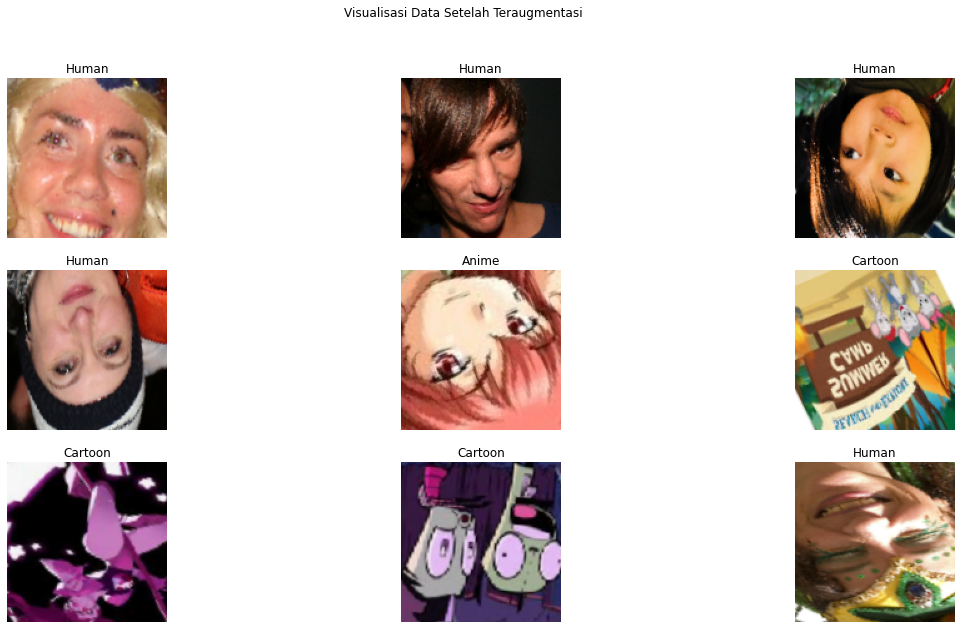

In [8]:
# Visualisasi Data setelah teraugmentasi

plt.figure(figsize=(20, 10))
plt.suptitle('Visualisasi Data Setelah Teraugmentasi')
images, labels = train_set.next()

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")
    
plt.show()

Ukuran gambar : (128, 128, 3)


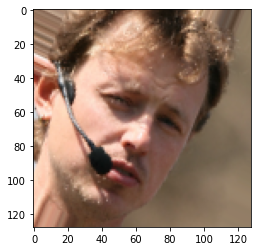

Ukuran gambar : (128, 128, 3)


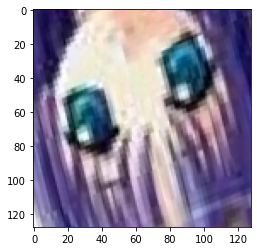

Ukuran gambar : (128, 128, 3)


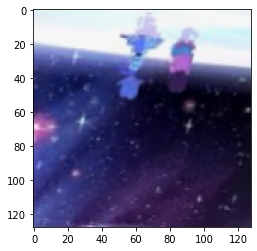

Ukuran gambar : (128, 128, 3)


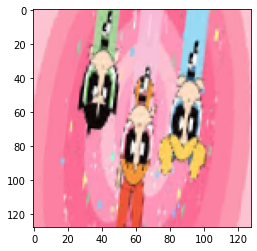

In [9]:
# Visualisasi Data Dengan Melihat Ukuran Gambarnya

for i in range(4):
    img, label = train_set.next()
    print("Ukuran gambar :",img[i].shape)
    plt.imshow(img[i])
    plt.show()


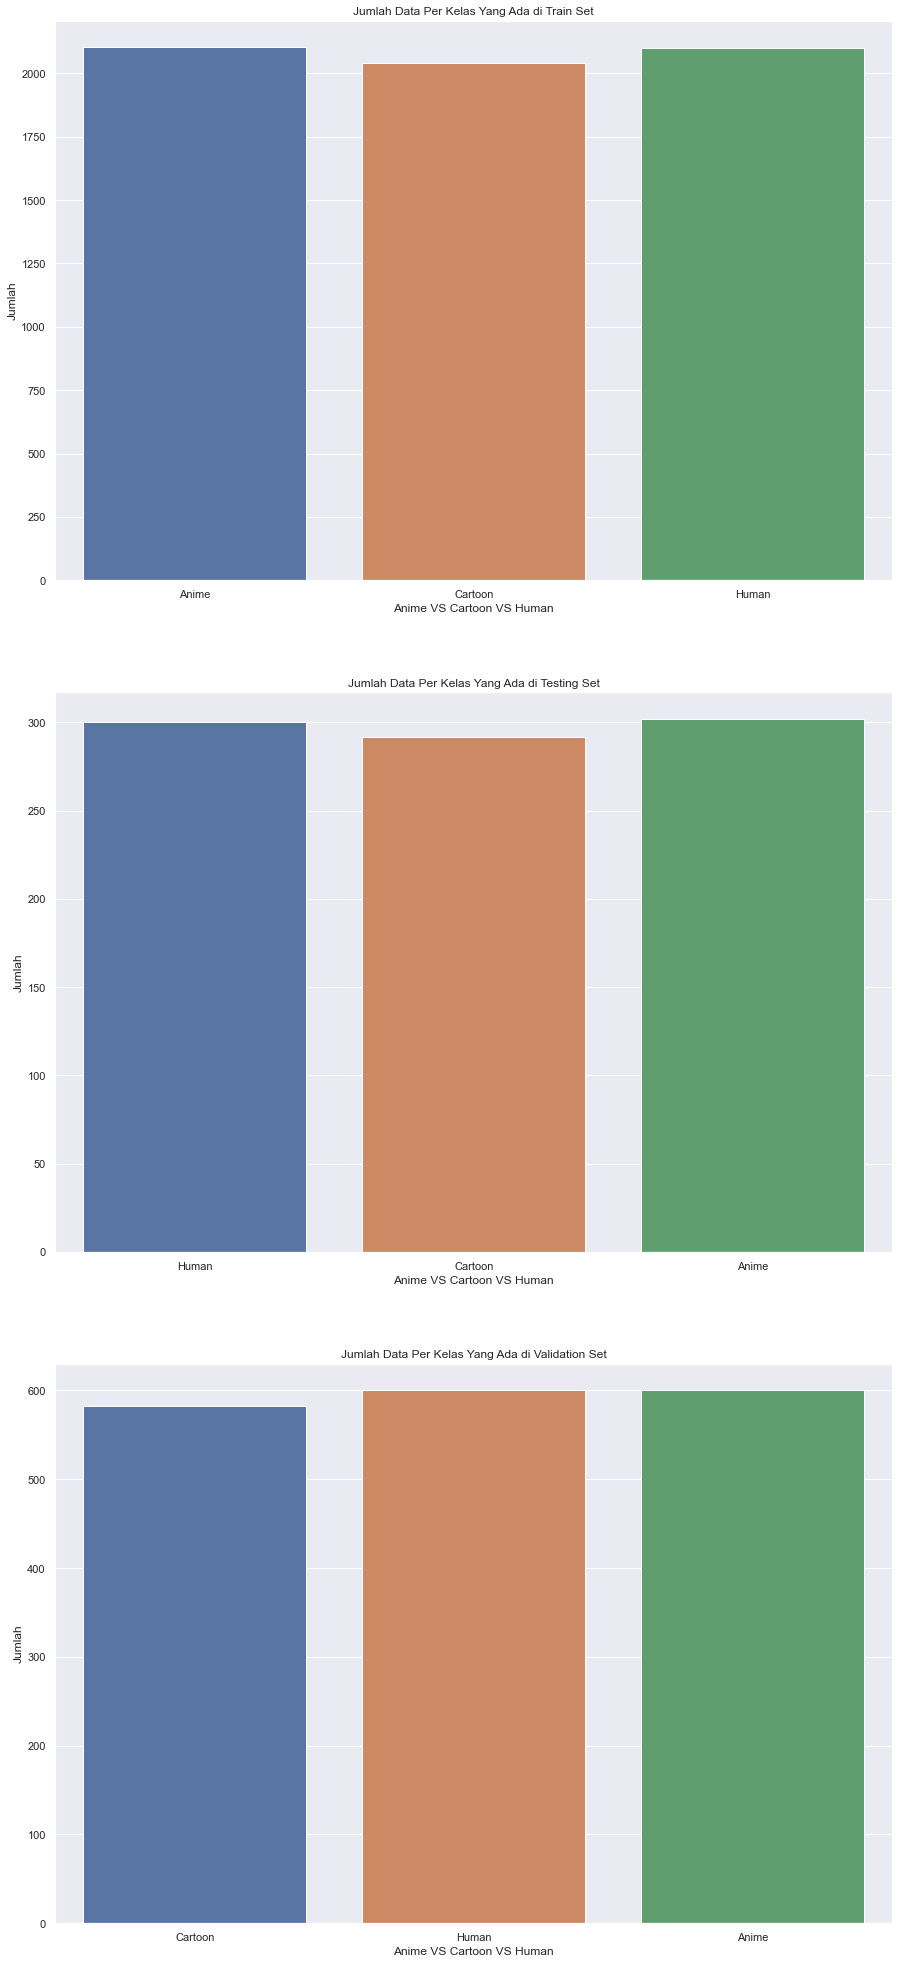

In [10]:
# Diagram bar untuk masing2 datasplit

plt.figure(figsize=(15, 35))

sns.set_theme()

plt.subplot(3, 1, 1)
sns.countplot(x=data_train)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Per Kelas Yang Ada di Train Set')

plt.subplot(3, 1, 2)
sns.countplot(x=data_test)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Per Kelas Yang Ada di Testing Set')

plt.subplot(3, 1, 3)
sns.countplot(x=data_val)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Per Kelas Yang Ada di Validation Set')

plt.show()

# 5. Modelling

In [11]:
model = tf.keras.Sequential([

#Input layer
tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=[128, 128, 3]),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

#Hidden layer
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Flatten(),
    
#Output layer
tf.keras.layers.Dense(3, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4

In [13]:
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [14]:

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.95):
            self.model.stop_training = True


In [15]:
hasil = model.fit(train_set, epochs=20, validation_data=val_set, verbose=1, callbacks=[myCallback()])

Epoch 1/20
196/196 [==============================] - 192s 973ms/step - loss: 0.6096 - accuracy: 0.7130 - val_loss: 0.8386 - val_accuracy: 0.6751
Epoch 2/20
196/196 [==============================] - 202s 1s/step - loss: 0.2898 - accuracy: 0.9000 - val_loss: 0.3333 - val_accuracy: 0.8866
Epoch 3/20
196/196 [==============================] - 195s 993ms/step - loss: 0.1964 - accuracy: 0.9295 - val_loss: 0.4386 - val_accuracy: 0.8485
Epoch 4/20
196/196 [==============================] - 195s 993ms/step - loss: 0.1713 - accuracy: 0.9418 - val_loss: 0.2936 - val_accuracy: 0.9024
Epoch 5/20
196/196 [==============================] - 322s 2s/step - loss: 0.1712 - accuracy: 0.9415 - val_loss: 0.2078 - val_accuracy: 0.9310
Epoch 6/20
196/196 [==============================] - 223s 1s/step - loss: 0.1666 - accuracy: 0.9410 - val_loss: 0.2004 - val_accuracy: 0.9400
Epoch 7/20
196/196 [==============================] - 207s 1s/step - loss: 0.1578 - accuracy: 0.9436 - val_loss: 0.1760 - val_accurac

In [16]:
# Evaluasi Data Testing

test_evaluate = model.evaluate(test_set, verbose=0)
print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {test_evaluate[1]}')

Test loss     : 0.07007315009832382
Test accuracy : 0.9787471890449524


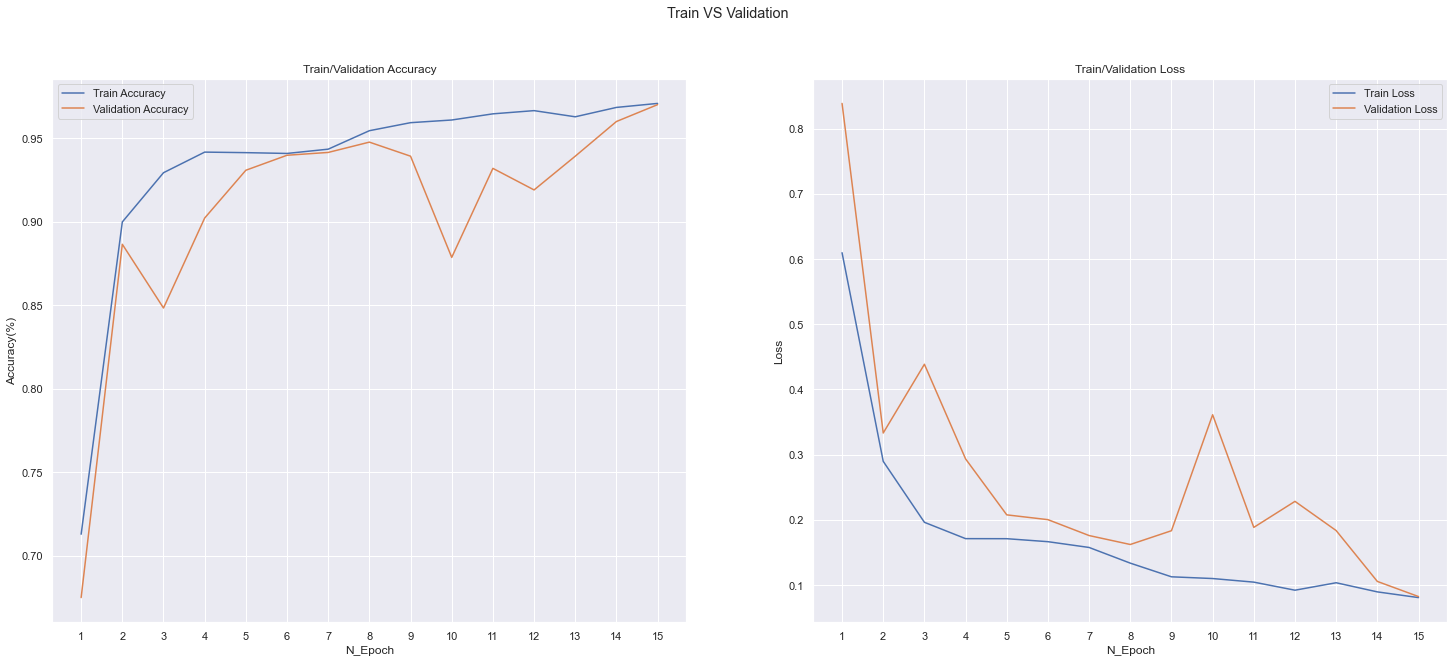

In [18]:
# Visualisasi akurasi dan loss dari fitting

epoch = [i+1 for i in range(15)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
# Save Model

model.save('Model Saved')

INFO:tensorflow:Assets written to: Model Saved\assets


INFO:tensorflow:Assets written to: Model Saved\assets


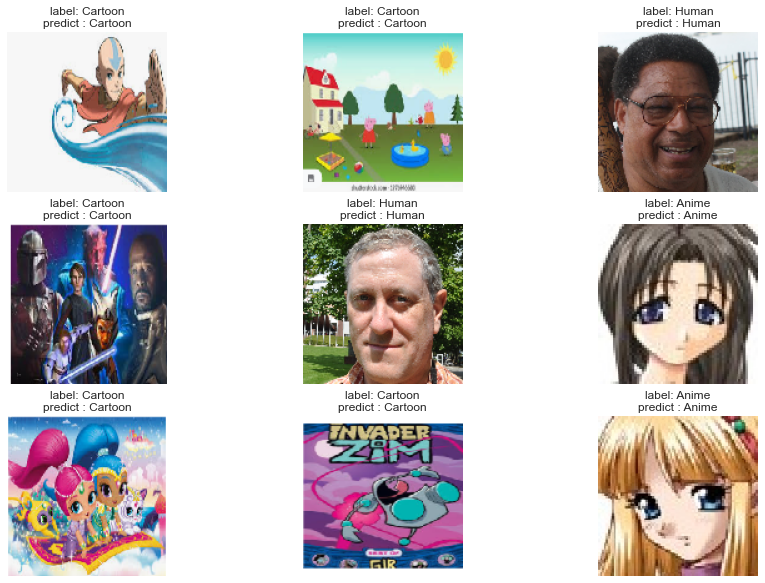

In [20]:
#Plot prediction

image ,label = next(iter(test_set))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}\npredict : {class_names[y_pred]}')

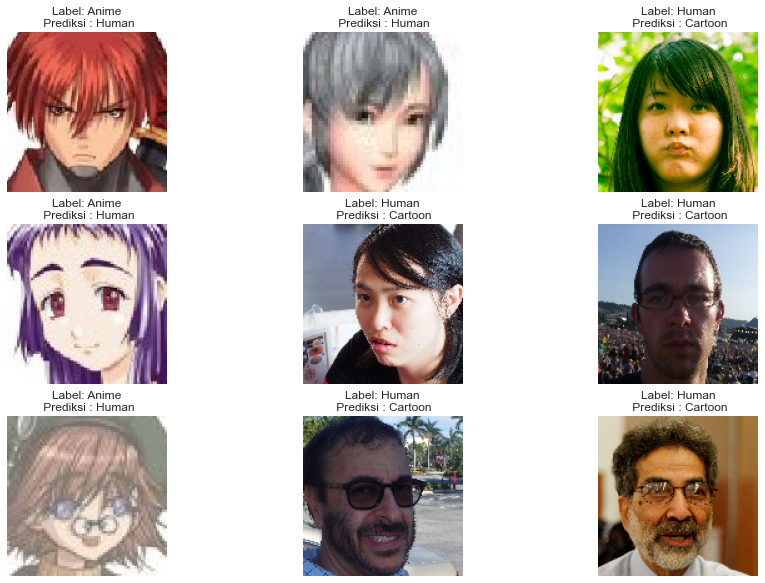

In [24]:
#Plot prediction Error
plt.figure(figsize=(15,10))

Trulabel = []
img = []
pred = []
for i in range(len(test_set)) :
    image,label = test_set.next()
    for j in range(32) :
        if (len(Trulabel) == 9) :
            break
        Aktual = class_names[np.argmax(label[j])]
        y_pred = np.argmax(model.predict(image[j][None,...],verbose=0))
        if (Aktual != class_names[y_pred]) :
            Trulabel.append(Aktual)
            img.append(image[j])
            pred.append(y_pred)

for k in range(9) :
    plt.subplot(3,3,k+1)
    plt.imshow(tf.squeeze(img[k]))
    plt.axis('off')
    plt.title(f'label: {Trulabel[k]}\n predict : {class_names[pred[k]]}')


In [26]:
# Untuk menyimpan hasil testing dan predict dari data testing
y_test = []
y_pred = []

for i in range(len(test_set)) :
    x,y = test_set.next()
    for j in range(len(y)) :
        y_test.append(class_names[tf.argmax(y[j])])
        y_pred.append(class_names[np.argmax(model.predict(x[j][None,...],verbose=0))])

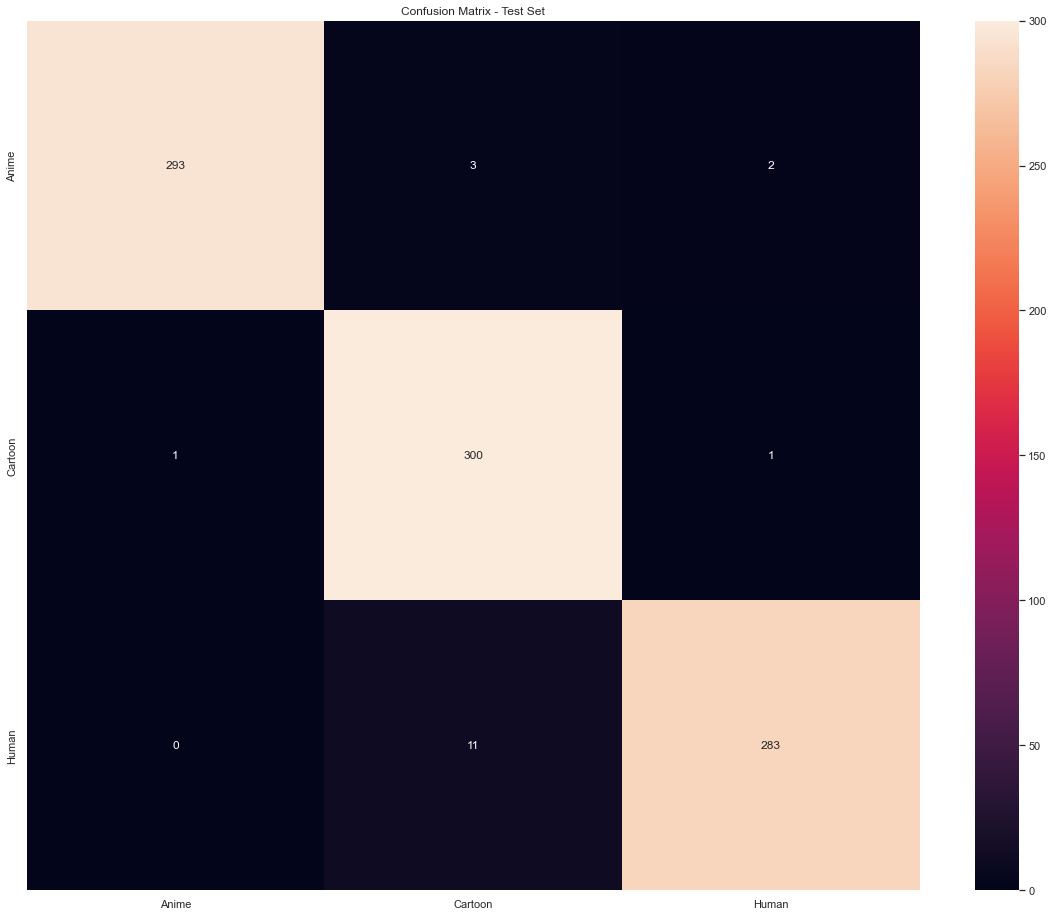

In [27]:
# Visualisasi Heatmap untuk Confusion Matrix

plt.figure(figsize=(20, 16))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix - Test Set")
plt.show()

In [ ]:
#Classification Report

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

       Anime       0.99      0.98      0.99       311
     Cartoon       0.96      0.99      0.97       293
       Human       0.98      0.97      0.97       290

    accuracy                           0.98       894
   macro avg       0.98      0.98      0.98       894
weighted avg       0.98      0.98      0.98       894

